<a href="https://colab.research.google.com/github/greatrifat/EDA/blob/main/EDA_on_Bank_Loan_Defaulter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df_app = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATASET/loan-defaulter/application_data.csv')
df_prev_app = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATASET/loan-defaulter/previous_application.csv')

In [4]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
df_prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


TARGET
*  1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample,
*   0 - all other cases






In [5]:
df_app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [6]:
df_app.shape

(307511, 122)

In [7]:
missing_info =pd.DataFrame(df_app.isnull().sum().sort_values(ascending=False)).reset_index()
missing_info.rename(columns={'index':'col_name', 0:'null_count'},inplace=True)
missing_info.head()

,col_name,null_count
0,COMMONAREA_MEDI,214865
1,COMMONAREA_AVG,214865
2,COMMONAREA_MODE,214865
3,NONLIVINGAPARTMENTS_MODE,213514
4,NONLIVINGAPARTMENTS_AVG,213514


In [8]:
missing_info['null_percent'] = missing_info['null_count']/df_app.shape[0]*100
missing_info.to_csv('missing_info.csv',index=False)
missing_info.head()

,col_name,null_count,null_percent
0,COMMONAREA_MEDI,214865,69.872297
1,COMMONAREA_AVG,214865,69.872297
2,COMMONAREA_MODE,214865,69.872297
3,NONLIVINGAPARTMENTS_MODE,213514,69.432963
4,NONLIVINGAPARTMENTS_AVG,213514,69.432963


<ipython-input-37-90bb68f3c770>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percentage[missing_percentage!=0],


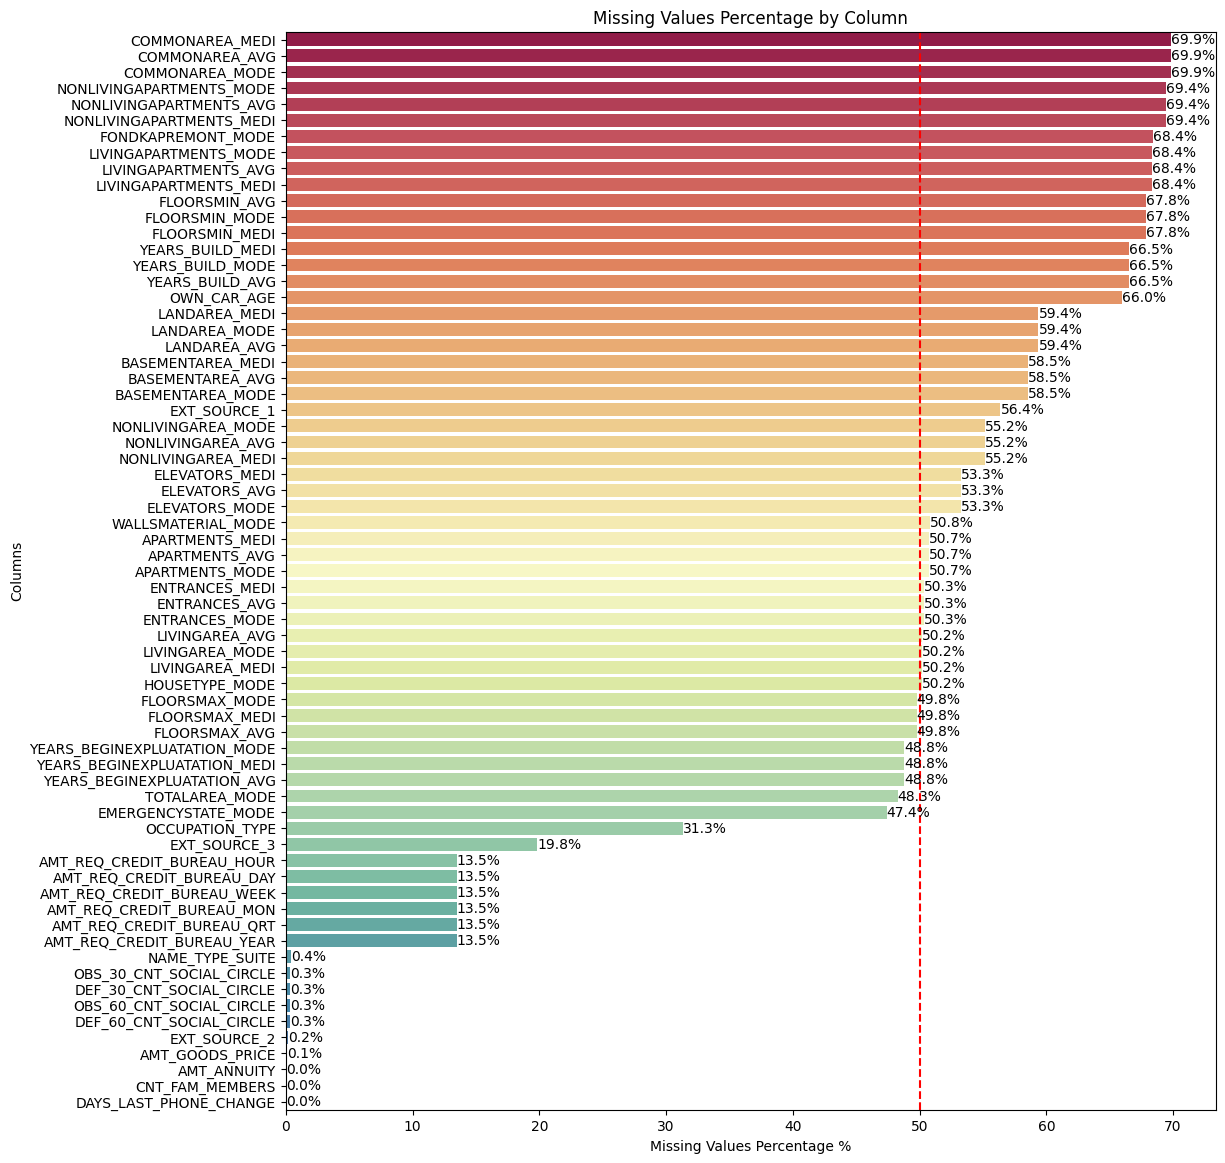

In [37]:
missing_percentage = (df_app.isna().mean() * 100).sort_values(ascending = False)
# Visualize non-zero missing values percentages
plt.figure(figsize=(12,14))
sns.barplot(x=missing_percentage[missing_percentage!=0],
            y=missing_percentage[missing_percentage!=0].index,
            palette="Spectral")

for index, value in enumerate(missing_percentage[missing_percentage != 0]):
    plt.text(value, index, f'{value:.1f}%', color='black', va="center")

plt.axvline(50, ls='--',color='red')
plt.xlabel('Missing Values Percentage %')
plt.ylabel('Columns')
plt.title('Missing Values Percentage by Column')
plt.show()

In [9]:
missing_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   col_name      122 non-null    object 
 1   null_count    122 non-null    int64  
 2   null_percent  122 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.0+ KB


In [10]:
#droping the columns with more than 40% missing rows
missing_col = missing_info[missing_info['null_percent'] >= 40]['col_name'].to_list()
len(missing_col)



49

In [11]:
app_missing_removed = df_app.drop(labels=missing_col,axis=1)
app_missing_removed.shape

(307511, 73)

In [12]:
flag_col = []

for col in app_missing_removed.columns:
  if col.startswith('FLAG_'):
    flag_col.append(col)

len(flag_col)

28

In [13]:
#flag and target relation df
flag_target = app_missing_removed[flag_col + ['TARGET']]
flag_target.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,N,N,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Y,Y,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,N,Y,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,N,Y,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='FLAG_OWN_CAR', ylabel='count'>

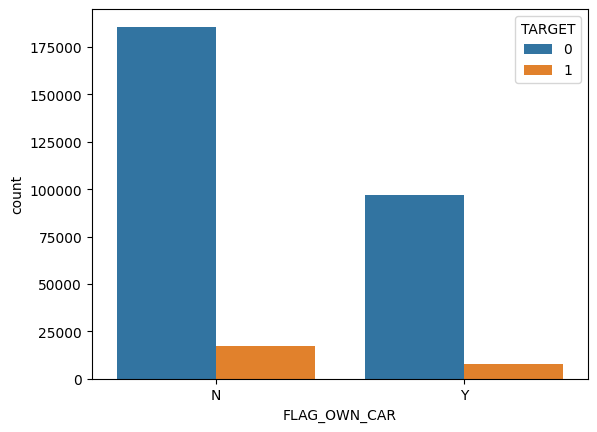

In [14]:
sns.countplot(data=flag_target,x='FLAG_OWN_CAR',hue='TARGET')

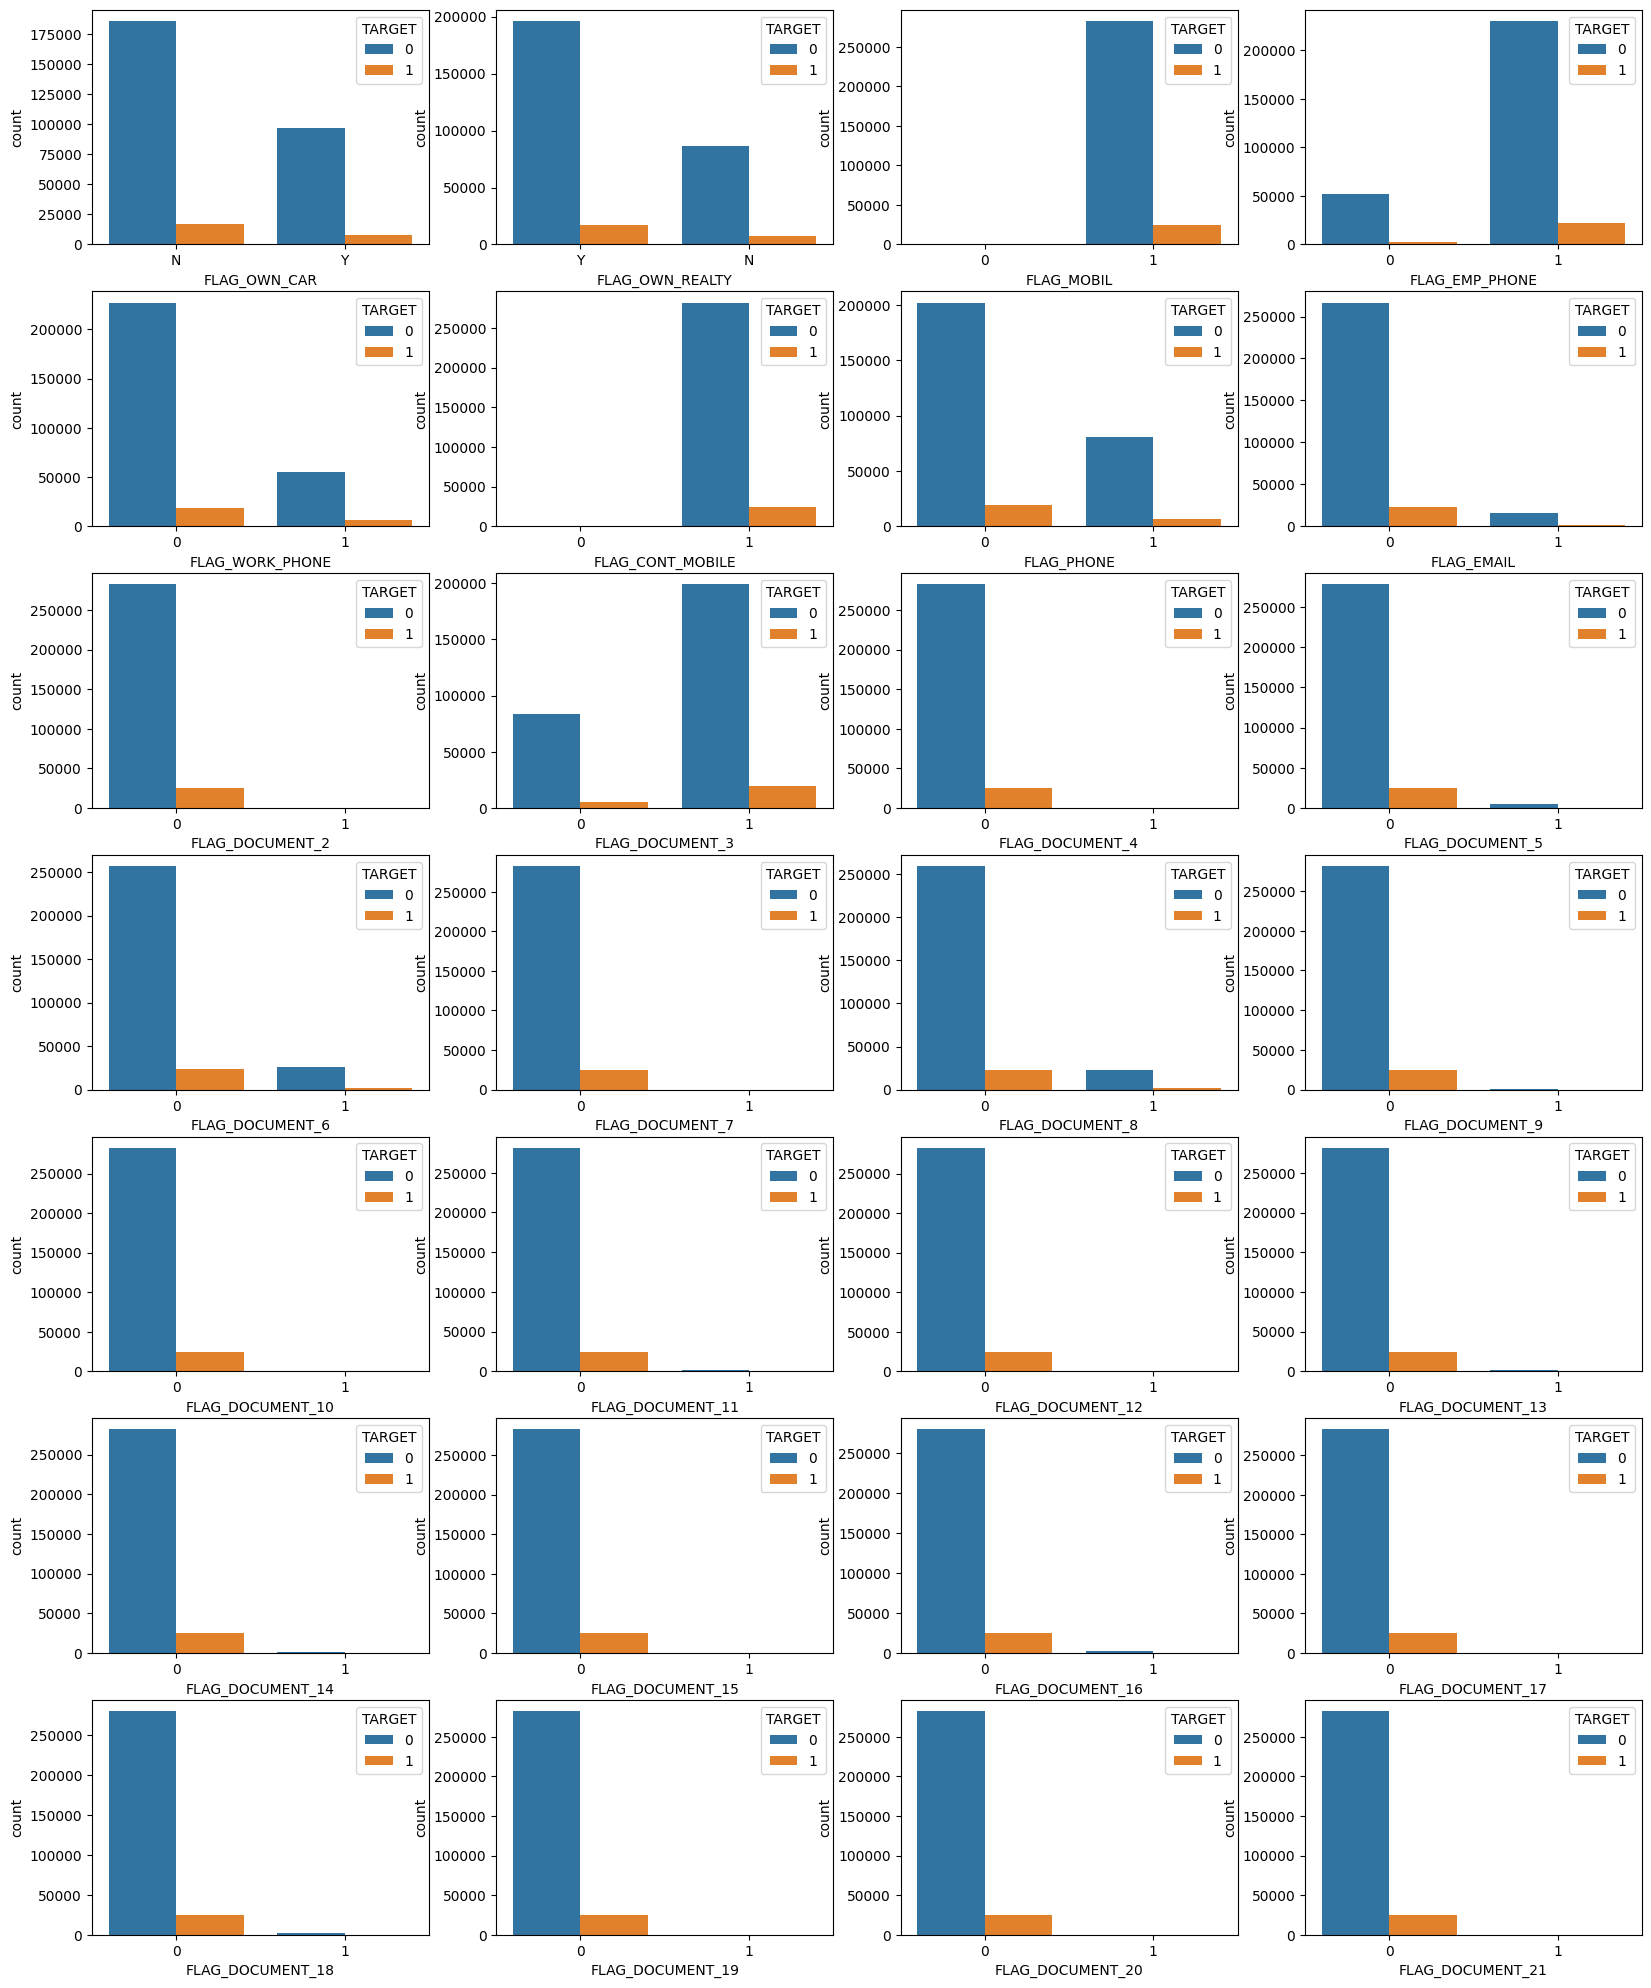

In [15]:
plt.figure(figsize=(20, 25))

for i, col in enumerate(flag_col):
  plt.subplot(7,4,i+1)
  sns.countplot(data=flag_target,x=col,hue='TARGET')

In [16]:
flag_col


['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [19]:
flag_corr = ['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL']

flag_corr_df = app_missing_removed[flag_corr +['TARGET']]

Y = 1
N = 0
for the heatmap it need to convert the string value to numeric

In [20]:
flag_corr_df = flag_corr_df.replace({'Y': 1, 'N': 0})
flag_corr_df = flag_corr_df.apply(pd.to_numeric, errors='coerce')
flag_corr_df.head()

<ipython-input-20-110f567b3d1b>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  flag_corr_df = flag_corr_df.replace({'Y': 1, 'N': 0})


,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,TARGET
0,0,1,1,1,0,1,1,0,1
1,0,0,1,1,0,1,1,0,0
2,1,1,1,1,1,1,1,0,0
3,0,1,1,1,0,1,0,0,0
4,0,1,1,1,0,1,0,0,0


<Axes: >

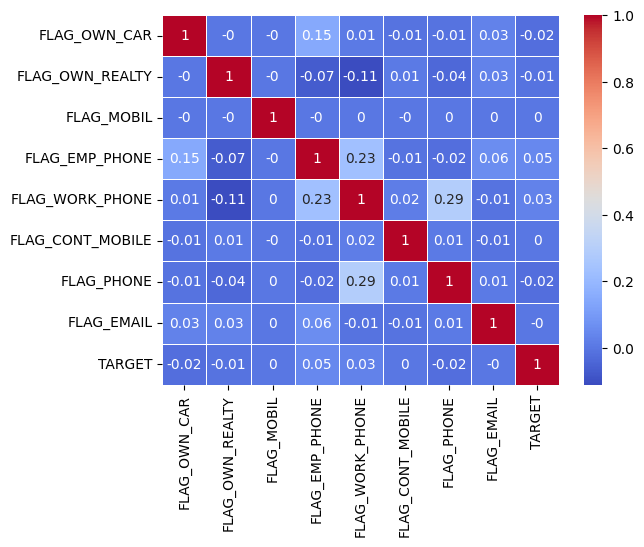

In [21]:
corr_df = round(flag_corr_df.corr(),2)
sns.heatmap(corr_df,cmap='coolwarm',linewidths=.5,annot=True)

In [22]:
app_missing_removed.shape

(307511, 73)

correlation coeeicient values less than +0.8 or greater than -0.8 are not significant. as any of them didn't meet the threshold so we drop this columns

In [23]:
app_flag_removed = app_missing_removed.drop(labels=flag_col,axis=1)
app_flag_removed.shape

(307511, 45)

In [24]:
app_flag_removed.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

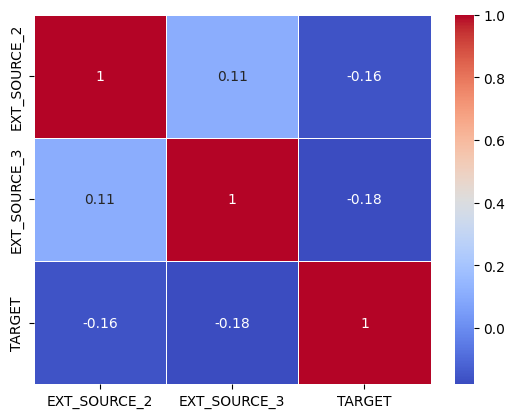

In [25]:
sns.heatmap(data=round(app_flag_removed[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].corr(),2),cmap='coolwarm',linewidths=.5,annot=True)

In [26]:
app_col_removed = app_flag_removed.drop(labels=['EXT_SOURCE_2','EXT_SOURCE_3'],axis=1)
app_col_removed.shape

(307511, 43)

# Feature Engineering

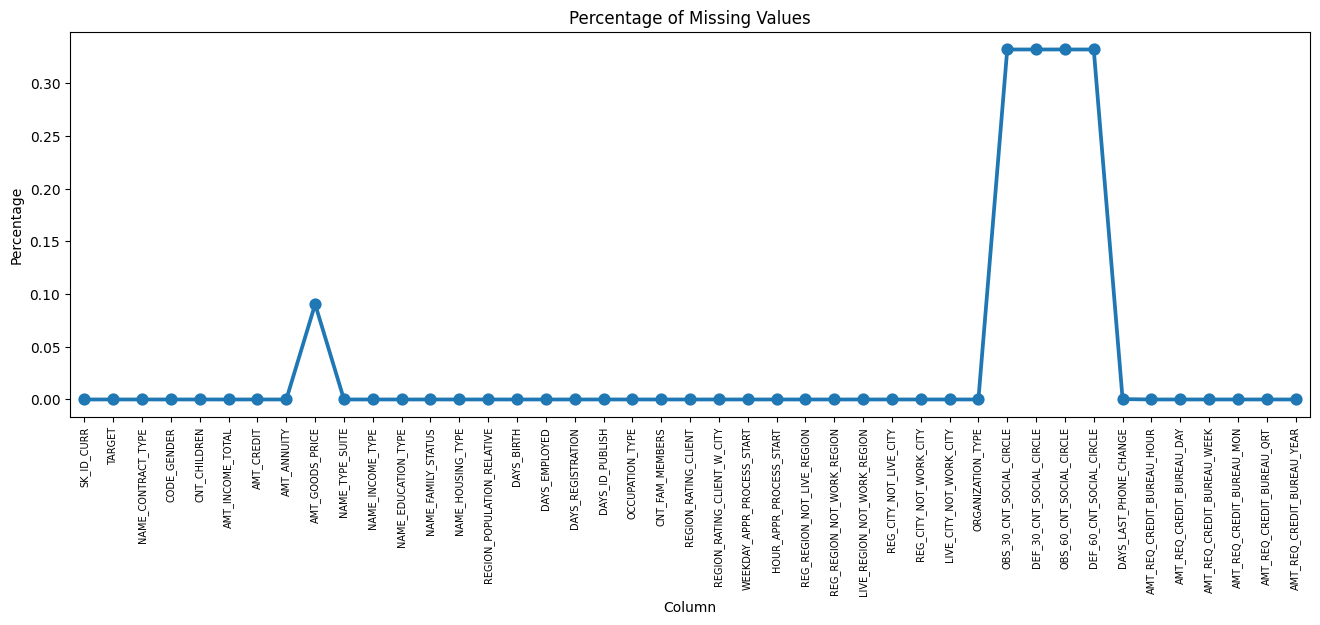

In [49]:
missing = pd.DataFrame({'Column': app_col_removed.columns, 'Percentage': (app_col_removed.isnull().sum() * 100) / app_col_removed.shape[0]})

# Plot
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='Column', y='Percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")

plt.show()

In [27]:
app_col_removed.isnull().sum().sort_values(ascending=False)/app_col_removed.shape[0]*100

,0
OCCUPATION_TYPE,31.345545
AMT_REQ_CREDIT_BUREAU_YEAR,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,13.501631
AMT_REQ_CREDIT_BUREAU_MON,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,13.501631
AMT_REQ_CREDIT_BUREAU_DAY,13.501631
AMT_REQ_CREDIT_BUREAU_HOUR,13.501631
NAME_TYPE_SUITE,0.420148
DEF_60_CNT_SOCIAL_CIRCLE,0.332021
OBS_30_CNT_SOCIAL_CIRCLE,0.332021


In [28]:
app_col_removed['CNT_FAM_MEMBERS'].mean()

2.152665450442101

In [29]:
app_col_removed['CNT_FAM_MEMBERS'] = app_col_removed['CNT_FAM_MEMBERS'].fillna(app_col_removed['CNT_FAM_MEMBERS'].mean())

In [30]:
app_col_removed['CNT_FAM_MEMBERS'].isnull().sum()

0

In [35]:
app_col_removed['OCCUPATION_TYPE'].mode()[0]

'Laborers'

In [36]:
app_col_removed['OCCUPATION_TYPE'] = app_col_removed['OCCUPATION_TYPE'].fillna(app_col_removed['OCCUPATION_TYPE'].mode()[0])
app_col_removed['OCCUPATION_TYPE'].isnull().sum()

0

In [38]:
app_col_removed['NAME_TYPE_SUITE'].mode()[0]

'Unaccompanied'

In [39]:
app_col_removed['NAME_TYPE_SUITE'] = app_col_removed['NAME_TYPE_SUITE'].fillna(app_col_removed['NAME_TYPE_SUITE'].mode()[0])
app_col_removed['NAME_TYPE_SUITE'].isnull().sum()

0

In [43]:
app_col_removed['AMT_ANNUITY'].describe()

,AMT_ANNUITY
count,307499.000000
mean,27108.573909
std,14493.737315
min,1615.500000
25%,16524.000000
50%,24903.000000
75%,34596.000000
max,258025.500000


In [44]:
app_col_removed['AMT_ANNUITY'] = app_col_removed['AMT_ANNUITY'].fillna(app_col_removed['AMT_ANNUITY'].mean())
app_col_removed['AMT_ANNUITY'].isnull().sum()

0

In [45]:
app_col_removed['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR
count,265992.000000
mean,0.006402
std,0.083849
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,4.000000


In [46]:
amt_req_col = []

for col in app_col_removed.columns:
  if col.startswith('AMT_REQ_CREDIT_BUREAU'):
    amt_req_col.append(col)

len(amt_req_col)

6

In [47]:
for col in amt_req_col:
  app_col_removed[col] = app_col_removed[col].fillna(app_col_removed['AMT_ANNUITY'].median())


In [48]:
app_col_removed[col].isnull().sum()

0